In [1]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model

In [2]:
df = pd.read_csv('table_8_offenses_known_to_law_enforcement_new_york_by_city_2013.csv', encoding = "ISO-8859-1")
df.head()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
0,Adams Village,"1,861",0,0.0,NaN,0,0,0,12,2,10,0,0.0
1,Addison Town and Village,"2,577",3,0.0,NaN,0,0,3,24,3,20,1,0.0
2,Akron Village,"2,846",3,0.0,NaN,0,0,3,16,1,15,0,0.0
3,Albany,"97,956",791,8.0,NaN,30,227,526,"4,090",705,"3,243",142,NaN
4,Albion Village,"6,388",23,0.0,NaN,3,4,16,223,53,165,5,NaN


In [3]:
df[-4:]

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
347,Yorktown Town,"36,643",15,0.0,NaN,0,2,13,334,45,287,2,NaN
348,1 The figures shown in this column for the off...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
349,2 The figures shown in this column for the off...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
350,3 The FBI does not publish arson data unless i...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df = df[:-3]
df[-4:]

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
344,Woodridge Village,829,7,0.0,NaN,0,0,7,17,8,9,0,0.0
345,Woodstock Town,"5,931",2,0.0,NaN,0,0,2,58,13,45,0,NaN
346,Yonkers,"199,134","1,036",6.0,NaN,25,390,615,"2,368",470,"1,662",236,10.0
347,Yorktown Town,"36,643",15,0.0,NaN,0,2,13,334,45,287,2,NaN


In [5]:
predict = pd.DataFrame()
predict['PropertyCrime'] = df['Property\ncrime'].str.replace(',','').astype(float)

In [6]:
feats = pd.DataFrame()
feats['PropertyCrime'] = df['Property\ncrime'].str.replace(',','').astype(float)
feats['Population'] = df['Population'].fillna(0)
feats['Population'] = feats['Population'].str.replace(',','').astype(float)
feats['PopSq'] = np.square(feats['Population'])
feats['MurderFull'] = df['Murder and\nnonnegligent\nmanslaughter'].astype(float)
feats['Murder'] = [m if m == 0 else m/m for m in df['Murder and\nnonnegligent\nmanslaughter']  ]
feats['RobberyFull'] = df['Robbery'].fillna(0)
feats['RobberyFull'] = feats['RobberyFull'].str.replace(',','').astype(float)
feats['Robbery'] = [r if r == 0 else r/r for r in feats['RobberyFull']]

In [7]:
def BoxHistOutliers(column, df_focus):
    import seaborn as sns
    
    colList = df_focus[column]
    
    # plots
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    sns.boxplot(y=column, data=df_focus)
    
    plt.subplot(1, 2, 2)
    g=sns.distplot(colList, kde=False, bins=5)
    
    # rotate label for large tick values on histagram x axis
    if (colList.max() > 9999):
        plt.setp(g.get_xticklabels(), rotation=45)

    plt.show()

In [8]:
 feats.head()

,PropertyCrime,Population,PopSq,MurderFull,Murder,RobberyFull,Robbery
0,12.0,1861.0,3.463321e+06,0.0,0.0,0.0,0.0
1,24.0,2577.0,6.640929e+06,0.0,0.0,0.0,0.0
2,16.0,2846.0,8.099716e+06,0.0,0.0,0.0,0.0
3,4090.0,97956.0,9.595378e+09,8.0,1.0,227.0,1.0
4,223.0,6388.0,4.080654e+07,0.0,0.0,4.0,1.0


In [9]:
feats.describe()

,PropertyCrime,Population,PopSq,MurderFull,Murder,RobberyFull,Robbery
count,348.000000,3.480000e+02,3.480000e+02,348.000000,348.000000,348.000000,348.000000
mean,792.606322,4.003763e+04,2.035547e+11,1.566092,0.140805,72.902299,0.600575
std,7659.724746,4.500374e+05,3.778876e+12,18.303673,0.348321,1031.032873,0.490486
min,0.000000,5.260000e+02,2.766760e+05,0.000000,0.000000,0.000000,0.000000
25%,40.500000,3.003000e+03,9.018117e+06,0.000000,0.000000,0.000000,0.000000
50%,112.500000,7.233500e+03,5.232568e+07,0.000000,0.000000,1.000000,1.000000
75%,341.000000,1.842750e+04,3.397536e+08,0.000000,0.000000,5.000000,1.000000
max,141971.000000,8.396126e+06,7.049493e+13,335.000000,1.000000,19170.000000,1.000000


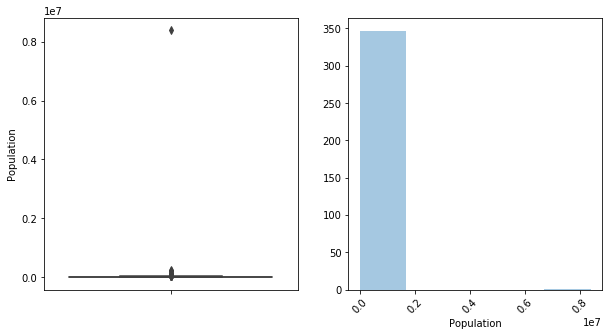

In [10]:
# Histogram and box plot
BoxHistOutliers('Population', feats)

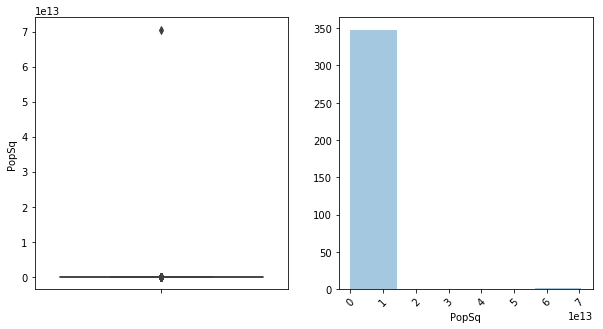

In [11]:
# Histogram and box plot
BoxHistOutliers('PopSq', feats)

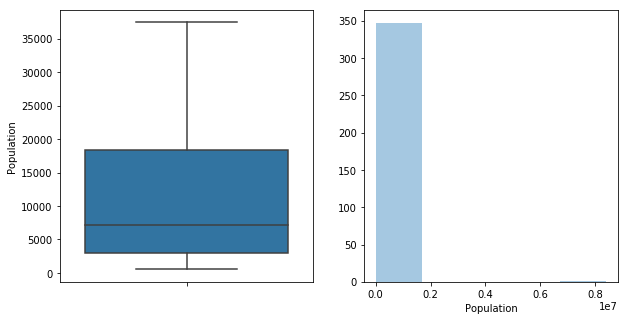

In [12]:
# plots
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.boxplot(y='Population', data=feats, showfliers=False)
    
plt.subplot(1, 2, 2)
g=sns.distplot(feats['Population'], kde=False, bins=5)

plt.show()

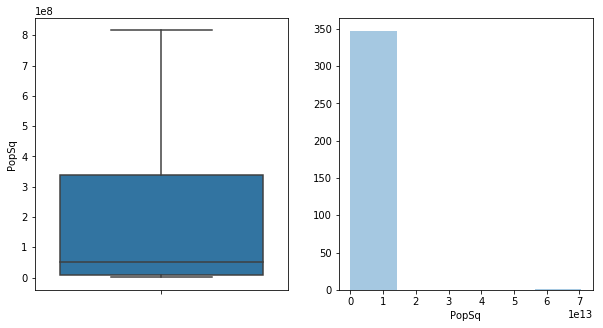

In [13]:
# plots
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.boxplot(y='PopSq', data=feats, showfliers=False)
    
plt.subplot(1, 2, 2)
g=sns.distplot(feats['PopSq'], kde=False, bins=5)

plt.show()

In [24]:
# Instantiate and fit model
regr = linear_model.LinearRegression()
Y = feats['PropertyCrime'].values.reshape(-1, 1)
#Population	PopSq	Murder	Robbery
X = feats[['Population','PopSq','Murder','Robbery','RobberyFull','MurderFull']]
regr.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [25]:
# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [[  1.52130152e-02  -9.44818779e-10  -6.46504116e+01   1.04837375e+02
    2.07765121e+00   1.22380130e+02]]

Intercept: 
 [-21.14821481]

R-squared:
0.998780265433


In [16]:
# Instantiate and fit model
regr = linear_model.LinearRegression()
Y = feats['PropertyCrime'].values.reshape(-1, 1)
#Population	PopSq	Murder	Robbery
X = feats[['Murder']]
regr.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [17]:
# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [[ 4192.91877688]]

Intercept: 
 [ 202.22408027]

R-squared:
0.0363550814419


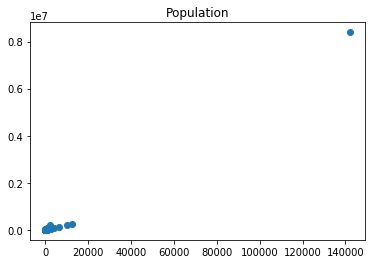

In [23]:
outcome = predict['PropertyCrime']
feature = feats['Population']

#Show 4 scatter plots for each of the continuous variables
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(outcome, feature)
plt.title('Population')
plt.show()

plt.subplot(1, 2, 2)
plt.scatter(outcome, feature)
plt.title('PopSq')
plt.show()

plt.subplot
plt.scatter(outcome, feature)
plt.title('MurderFull')
plt.show()

plt.scatter(outcome, feature)
plt.title('RobberyFull')
plt.show()


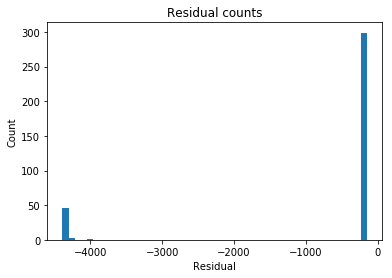

In [19]:
# Extract predicted values.
predicted = regr.predict(X).ravel()
actual = predict['PropertyCrime']

# Calculate the error, also called the residual.
residual = actual - predicted

# This looks a bit concerning.
plt.hist(residual, bins=50)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

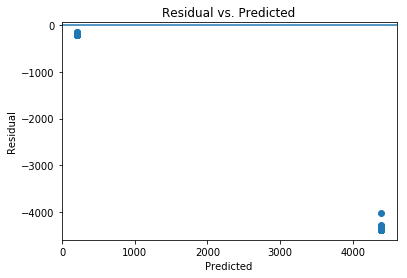

In [20]:
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

In [21]:
correlation_matrix = X.corr()
display(correlation_matrix)

,Murder
Murder,1.0


In [22]:
# Instantiate and fit model
regr = linear_model.LinearRegression()
Y = featsFilt['PropertyCrime'].values.reshape(-1, 1)
#Population	PopSq	Murder	Robbery
X = featsFilt[['Population','PopSq','Murder','Robbery']]
regr.fit(X,Y)

NameError: name 'featsFilt' is not defined

# Remove Outlier

In [ ]:
feats[feats['Population'] >= np.percentile(feats['Population'], 100)]

In [ ]:
#[r < np.percentile(feats['Population'], 100) for r in feats['Population']]
#feats['Murder'] = [m if m == 0 else m/m for m in df['Murder and\nnonnegligent\nmanslaughter']  ]
#[r if r >= np.percentile(feats['Population'], 100) for r in feats['Population']]
featsFilt = pd.DataFrame()
featsFilt = feats[feats['Population'] < np.percentile(feats['Population'], 100)]
featsFilt.describe()

In [ ]:
# Instantiate and fit model
regr = linear_model.LinearRegression()
Y = featsFilt['PropertyCrime'].values.reshape(-1, 1)
#Population	PopSq	Murder	Robbery
X = featsFilt[['Population','PopSq','Murder','Robbery']]
regr.fit(X,Y)

In [ ]:
# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))

# Write-up

Using the following features:

Population

Population Squared

Murder (if greater than one: True, otherwise: False)

Robbery (if greater than one: True, otherwise: False)


Population and Population Squared had one extreme outlier.  However the R squared result for these features was .996. 

In [ ]:
# Instantiate and fit model
regr = linear_model.LinearRegression()
Y = feats['PropertyCrime'].values.reshape(-1, 1)
#Population	PopSq	Murder	Robbery
X = feats[['Population','PopSq','Murder','Robbery']]
regr.fit(X,Y)
# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))